# Web Scraping With BeautifulSoup
Sometimes the most interesting data sets don’t come with an API or pre-packaged plain-text CSVs. In these situations, web scraping can be a powerful tool, enabling us to extract and convert data from almost any format found on the internet into a tabular form we can conduct further analysis on. 
For this section we will be working with historic population estimates of different US states listed on Wikipedia here:https://en.wikipedia.org/wiki/List_of_states_in_India_by_past_population. In this ,we will how to import html-tables on the web into something you can manipulate with pandas. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import requests 
from bs4 import BeautifulSoup 

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_states_in_India_by_past_population"
r = requests.get(url)

In [4]:
r.text

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of states in India by past population - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_states_in_India_by_past_population","wgTitle":"List of states in India by past population","wgCurRevisionId":800415242,"wgRevisionId":800415242,"wgArticleId":31430266,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","States and territories of India-related lists","Ranked lists of country subdivisions"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageConten

Now, we have all our data in the notebook. Unfortunately, it is the form of one really long string, which is hard to work with directly. This is where BeautifulSoup comes in.

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')

In [6]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of states in India by past population - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_states_in_India_by_past_population","wgTitle":"List of states in India by past population","wgCurRevisionId":800415242,"wgRevisionId":800415242,"wgArticleId":31430266,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","States and territories of India-related lists","Ranked lists of country subdivisions"],"wgBreakFrames":false,"wgPageContentLanguage":"

In [7]:
soup.find('title')

<title>List of states in India by past population - Wikipedia</title>

In [8]:
soup.find_all('title')

[<title>List of states in India by past population - Wikipedia</title>]

In [9]:
tables = soup.find_all("table",attrs = {"class":"wikitable"})

In [10]:
tables

[<table class="wikitable sortable">\n<tr>\n<th style="background-color:#99ccff">Rank</th>\n<th style="background-color:#99ccff"><a class="mw-redirect" href="/wiki/States_and_territories_of_India" title="States and territories of India">State or union territory</a></th>\n<th style="background-color:#99ccff"><a href="/wiki/Demographics_of_India" title="Demographics of India">Population</a> (1951 Census)<sup class="reference" id="cite_ref-indiabudget.nic.in_11-0"><a href="#cite_note-indiabudget.nic.in-11">[11]</a></sup></th>\n<th style="background-color:#99ccff"><a href="/wiki/Demographics_of_India" title="Demographics of India">Population</a> (1961 Census)<sup class="reference" id="cite_ref-indiabudget.nic.in_11-1"><a href="#cite_note-indiabudget.nic.in-11">[11]</a></sup></th>\n<th style="background-color:#99ccff"><a href="/wiki/Demographics_of_India" title="Demographics of India">Population</a> (1971 Census)<sup class="reference" id="cite_ref-indiabudget.nic.in_11-2"><a href="#cite_note

In [11]:
display(HTML(tables[0].prettify()))

Rank,State or union territory,Population (1951 Census) [11],Population (1961 Census) [11],Population (1971 Census) [11],Population (1981 Census) [11],Population (1991 Census) [11],Population (2001 Census) [11],Population (2011 Census) [11]
1,Uttar Pradesh,"60,274,800","70,144,160","83,849,775","105,113,300","132,062,800","166,053,600","199,581,477"
2,Maharashtra,"32,002,500","39,554,900","50,412,240","62,782,820","78,937,190","96,752,500","112,372,972"
3,Bihar,"29,085,900","34,841,490","42,126,800","52,303,000","64,531,200","82,879,910","103,804,630"
4,West Bengal,"26,300,670","34,926,000","44,312,017","54,580,650","68,077,970","80,221,300","91,347,736"
5,Madhya Pradesh,"18,615,700","23,218,950","30,017,180","38,169,500","48,566,800","60,385,090","72,597,565"
6,Tamil Nadu,"30,119,680","33,687,100","41,199,170","48,408,080","55,859,300","62,111,390","72,138,958"
7,Rajasthan,"15,971,130","20,156,540","25,765,810","34,361,860","44,005,990","56,473,300","68,621,012"
8,Karnataka,"19,402,500","23,587,910","29,299,015","37,135,710","44,977,200","52,734,986","61,130,704"
9,Gujarat,"16,263,700","20,633,305","26,697,488","34,085,800","41,309,580","50,597,200","60,383,628"
10,Andhra Pradesh,"31,115,000","35,983,480","43,502,710","53,551,030","66,508,170","75,728,400","49,665,533"


In [12]:
population = dict()
import re
header_row = tables[0].find('tr')
columns = [(idx,re.findall('\d{3,4}',x.text)[0]) for idx,x in enumerate(header_row.find_all('th')) if idx >= 2]
columns

[(2, u'1951'),
 (3, u'1961'),
 (4, u'1971'),
 (5, u'1981'),
 (6, u'1991'),
 (7, u'2001'),
 (8, u'2011')]

In [13]:
rows = tables[0].find_all("tr")[1:]
len(rows)

37

In [14]:
pop = {}
def clean_int(s):
    s = s.strip().replace(',','')
    if s == 'N/A' or s == 'NA':
        s = 0
    return s
for row in rows:
    state_name = row.find_all('td')[1].text
    all_cells = [c.text for c in row.find_all('td')]
    new_values = {name:clean_int(all_cells[idx]) for (idx,name) in columns}
    pop[state_name] = new_values

In [15]:
pop

{u'Andaman and Nicobar Islands': {u'1951': u'31480',
  u'1961': u'64160',
  u'1971': u'115874',
  u'1981': u'189496',
  u'1991': u'281990',
  u'2001': u'356650',
  u'2011': u'379944'},
 u'Andhra Pradesh': {u'1951': u'31115000',
  u'1961': u'35983480',
  u'1971': u'43502710',
  u'1981': u'53551030',
  u'1991': u'66508170',
  u'2001': u'75728400',
  u'2011': u'49665533'},
 u'Arunachal Pradesh': {u'1951': 0,
  u'1961': u'337300',
  u'1971': u'468885',
  u'1981': u'632502',
  u'1991': u'865900',
  u'2001': u'1098328',
  u'2011': u'1382611'},
 u'Assam': {u'1951': u'8029100',
  u'1961': u'10837700',
  u'1971': u'14625157',
  u'1981': u'18041250',
  u'1991': u'22414320',
  u'2001': u'26638600',
  u'2011': u'31169272'},
 u'Bihar': {u'1951': u'29085900',
  u'1961': u'34841490',
  u'1971': u'42126800',
  u'1981': u'52303000',
  u'1991': u'64531200',
  u'2001': u'82879910',
  u'2011': u'103804630'},
 u'Chandigarh': {u'1951': u'24948',
  u'1961': u'120480',
  u'1971': u'257100',
  u'1981': u'45296

In [16]:
df = pd.DataFrame.from_dict(pop,orient='index')
df

,1991,1981,1961,1971,2001,1951,2011
Andaman and Nicobar Islands,281990,189496,64160,115874,356650,31480,379944
Andhra Pradesh,66508170,53551030,35983480,43502710,75728400,31115000,49665533
Arunachal Pradesh,865900,632502,337300,468885,1098328,0,1382611
Assam,22414320,18041250,10837700,14625157,26638600,8029100,31169272
Bihar,64531200,52303000,34841490,42126800,82879910,29085900,103804630
Chandigarh,642374,452960,120480,257100,901080,24948,1054686
Chhattisgarh,17615600,14010110,9154330,11637800,20834530,7457700,25540196
Dadra and Nagar Haveli,138290,104300,58020,74880,220963,42846,342853
Daman and Diu,102110,79842,37587,63000,158080,49482,242911
Delhi,9421311,6220973,2659990,4066400,13851503,1744500,16753235


In [17]:
df = df.drop(['India'])
df

,1991,1981,1961,1971,2001,1951,2011
Andaman and Nicobar Islands,281990,189496,64160,115874,356650,31480,379944
Andhra Pradesh,66508170,53551030,35983480,43502710,75728400,31115000,49665533
Arunachal Pradesh,865900,632502,337300,468885,1098328,0,1382611
Assam,22414320,18041250,10837700,14625157,26638600,8029100,31169272
Bihar,64531200,52303000,34841490,42126800,82879910,29085900,103804630
Chandigarh,642374,452960,120480,257100,901080,24948,1054686
Chhattisgarh,17615600,14010110,9154330,11637800,20834530,7457700,25540196
Dadra and Nagar Haveli,138290,104300,58020,74880,220963,42846,342853
Daman and Diu,102110,79842,37587,63000,158080,49482,242911
Delhi,9421311,6220973,2659990,4066400,13851503,1744500,16753235


In [18]:
#df['2011'] = df['2011'].astype(int)
for x in df.columns:
    df[x] = df[x].astype(int)

In [19]:
cols = ['1951','1961', '1971', '1981', '1991', '2001', '2011']
df = df[cols]

In [20]:
df.head()

,1951,1961,1971,1981,1991,2001,2011
Andaman and Nicobar Islands,31480,64160,115874,189496,281990,356650,379944
Andhra Pradesh,31115000,35983480,43502710,53551030,66508170,75728400,49665533
Arunachal Pradesh,0,337300,468885,632502,865900,1098328,1382611
Assam,8029100,10837700,14625157,18041250,22414320,26638600,31169272
Bihar,29085900,34841490,42126800,52303000,64531200,82879910,103804630


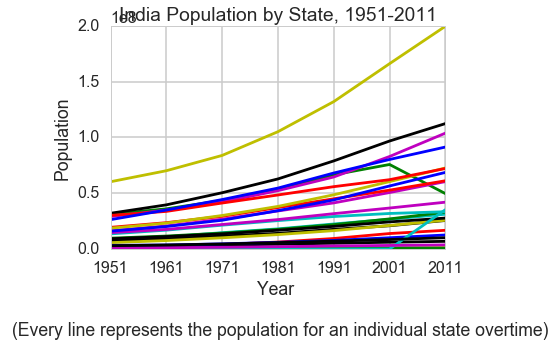

In [21]:
#plt.figure(figsize=(50,10))
df.T.plot(legend=None)
plt.ylabel("Population")
plt.xlabel('Year \n\n (Every line represents the population for an individual state overtime)')
plt.title("India Population by State, 1951-2011")

In [22]:
df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)

,1951,1961,1971,1981,1991,2001,2011
Andaman and Nicobar Islands,0.008718,0.014607,0.021138,0.027728,0.033320,0.034724,0.031380
Andhra Pradesh,8.616573,8.192013,7.935976,7.835801,7.858541,7.373031,4.101920
Arunachal Pradesh,0.000000,0.076790,0.085536,0.092550,0.102314,0.106935,0.114191
Assam,2.223472,2.467315,2.667992,2.639868,2.648454,2.593574,2.574298
Bihar,8.054661,7.932028,7.684976,7.653185,7.624944,8.069312,8.573316
Chandigarh,0.006909,0.027429,0.046901,0.066279,0.075902,0.087730,0.087107
Chhattisgarh,2.065236,2.084078,2.123024,2.050015,2.081442,2.028481,2.109387
Dadra and Nagar Haveli,0.011865,0.013209,0.013660,0.015262,0.016340,0.021513,0.028317
Daman and Diu,0.013703,0.008557,0.011493,0.011683,0.012065,0.015391,0.020062
Delhi,0.483099,0.605574,0.741812,0.910278,1.113213,1.348603,1.383664


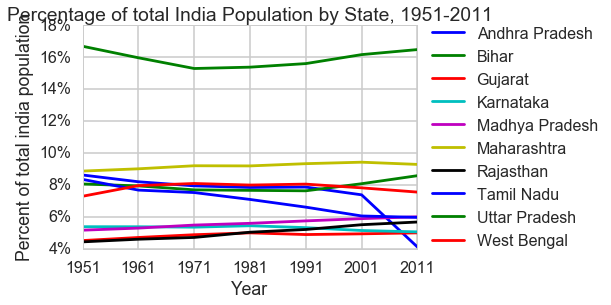

In [23]:
import matplotlib.ticker as mtick
cols = df.columns
largest = df['2011'].nlargest(10).index
by_percent = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
by_percent[by_percent.index.isin(largest)].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total india population")
plt.xlabel("Year")
plt.title("Percentage of total India Population by State, 1951-2011")

# Make y-axis percentages 
ax = plt.gca()
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

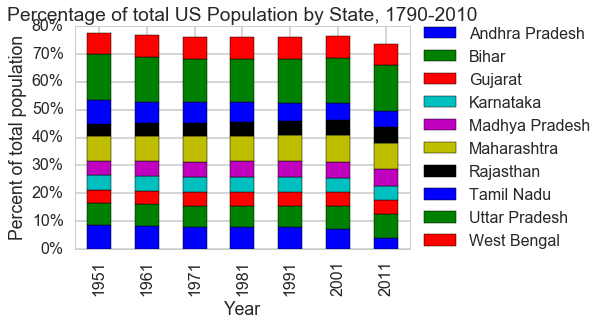

In [24]:
by_percent[by_percent.index.isin(largest)].T.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total population")
plt.xlabel("Year")
plt.title("Percentage of total US Population by State, 1790-2010")

ax = plt.gca()
ax.yaxis.set_major_formatter(yticks)

In [25]:
df1 = df.reset_index()
a = []
for x in df.columns:
    print df[x].argmax()
#Uttar Pradesh is Maximum population in every year
#df1.loc[df1['1951'].idxmax()]

Uttar Pradesh
Uttar Pradesh
Uttar Pradesh
Uttar Pradesh
Uttar Pradesh
Uttar Pradesh
Uttar Pradesh
